## 4. Destek Vektör Makineleri - (Support Vector Machines - SVM)

Amacımız, veriyi en iyi şekilde **optimal hiperdüzlemi (decision boundary - karar sınırı)** bulmaktır.

* Sınıfları birbirinden en iyi ayıran **doğru/hiperdüzlem** bulunur.
* **Destek vektörleri** (sınıf sınırına en yakın noktalar) kullanılarak **marjinin maksimizasyonu** sağlanır.

* **Hiperdüzlem Denklemi:**

$$
w*x+b = 0
$$

* $w$ : Ağırlık vektörü (Hyperplane eğimi)
* $b$ : Bias (offset)
* $x$ : Girdi vektörü

<br></br>

* **Karar Fonksiyonu:**
$$
f(x) = sign(w*x+b)
$$

* **sign** fonksiyonu, matematikte ve makine öğrenmesinde bir sayının **işaretini** (pozitif/negatif) belirleyen basit bir fonksiyondur. SVM'de ise modelin tahminini **+1 veya -1 gibi ikili değerlere** dönüştürmek için kullanılır.

<br></br>

* **Destek Vektörleri (Support Vectors):**
$$
y_i (w*x_i+b) = 1
$$

**Avantajlar:**
* **Yüksek Doğruluk** sağlar (özellikle küçük/orta boyutlu verilerde)
* **Aşırı Uyum (overfitting) riski düşüktür**
* **Doğrusal ve doğrusal olmayan** verilerde çalışabilir.

**Dezavantajları:**
* Büyük veri setlerinde ağır çalışır.
* Hiperparametre ayarı (kernel, C, gamma) kritiktir.
* Yorumlanabilirlik zordur (karar ağaçlarına kıyasla)

| Parametre  | Açıklama          | Önerilen Değerler |
|------------|-------------------|-------------------|
| C          | tolerans değeri   | 0.1 , 1 , 10      |
| kernel     | linear, rbf, poly | rbf (varsayılan)  |
| gamma (RBF)| Kernel katsayısı  | scale veya auto   |
| degree     | Polinom derecesi  | 2, 3, 4           |

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("titanic")

# Eksik değerleri doldurma
df.fillna({"age": df["age"].median()}, inplace=True)
df.fillna({"embarked":df['embarked'].mode()[0]}, inplace=True)
df.drop('deck', axis=1, inplace=True)

# Kategorik değişkenleri sayısal formata dönüştürme
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'adult_male'], drop_first=True)

# Gereksiz sütunları kaldırma
df.drop(['alive', 'embark_town', 'pclass'], axis=1, inplace=True)

# Bağımlı ve bağımsız değişkeni belirleme
X = df.drop('survived', axis=1)
y = df['survived']

# Veriyi ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ÖZELLİK ÖLÇEKLENDİRME (FEATURE SCALING) - SVM İÇİN KRİTİK ADIM
# SVM, özelliklerin büyüklüklerine karşı hassastır. Örneğin 'fare' (bilet ücreti)
# 0-500 arası değerler alırken, 'sex_male' 0 ya da 1 değeri alır. Bu durum, modelin 'fare' özelliğine daha fazla ağırlık vermesine neden olabilir.
# StandardScaler, tüm özellikleri ortalaması 0, standart sapması 1 olan bir dağılıma dönüştürerek bu sorunu çözer.
scaler = StandardScaler()

# Ölçekleyiciyi SADECE eğitim verisine göre 'fit' ediyoruz.
# Test verisine göre fit edersek, test verisinden bilgi sızdırmış oluruz.
X_train_scaled = scaler.fit_transform(X_train)


# Hem eğitim hem de test verisini bu ölçekleyici ile 'transform' ediyoruz.
X_test_scaled = scaler.transform(X_test)


# Destek Vektör Makineleri (SVM) Modelini Oluşturma ve Eğitme
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# kernel='rbf': Radyal Tabanlı Fonksiyon, çoğu durum için en iyi başlangıçtır.
# C=1.0: Ceza parametresi. Yanlış sınıflandırmalara ne kadar tolerans gösterileceğini belirler.
# gamma='scale': Kernel katsayısını belirler. 'scale' değeri otomatik ayar yapar.
# random_state: Sonuçların tekrarlanabilir olması için.


# Modeli ÖLÇEKLENDİRİLMİŞ eğitim verisi ile eğitiyoruz
svm_model.fit(X_train_scaled, y_train)


# Tahminleri ÖLÇEKLENDİRİLMİŞ test verisi üzerinden yapıyoruz
y_pred = svm_model.predict(X_test_scaled)


# Doğruluk skorunu hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModelin Doğruluk Oranı: {accuracy * 100:.2f}%")


Modelin Doğruluk Oranı: 82.68%


## 5. Naive Bayes 

**Bayes Teorimi**'ne dayanır. Algoritmanın yaptığı şey, bir olayın özelliklerine bakarak, o olayın belirli bir sınıfa ait olma **olasılığını** hesaplamaktır. Özellikle spam tespiti, duygu analizi gibi alanlarda çok iyi sonuç verebiliyor.
<br></br>
**Bayes Teoremi**

Denklem:
$$
P(A|B) =  \frac {P(B|A) * P(A)}{P(B)}
$$

* A : Sınıf (örneğin, "Spam")
* B : Özellikler (örneğin, e-postada "free" kelimesinin geçmesi)

**1. $P(A|B)$ -> Posterior Olasılık (Sonuç Olasılığı):** Aradığımız şey budur. "E-postada 'free' kelimesi varsa, bu e-postanın Spam olma olasılığı nedir?"

**2. $P(B|A)$ -> Likelihood (Olabilirlik):** "Bir e-postanın Spam olduğu biliniyorsa, içinde 'free' kelimesinin geçme olasılığı nedir?" Bunu eğitim verimizden kolayca hesaplayabiliriz: (içinde 'free' olan spam e-postaların sayısı) / (toplam e-posta sayısı)

**3. $P(A)$ -> Prior Olasılık (Öncül Olasılık):** "Herhangi bir e-postanın, içeriğine bakılmaksızın, Spam olma olasılığı nedir?" Bunu da eğitim verimizden hesaplarız. (Toplam spam e-posta sayısı) / (toplam e-posta sayısı)

**4. $P(B)$ -> Evidence (Kanıt):** "Herhangi bir e-postada, spam olup olmadığına bakılmaksızın, 'free' kelimesinin geçme olasılığı nedir?" Bu, bir normalleştirme faktörüdür.

<br></br>
**Naive Bayes Türleri**
* **Gaussian Naive Bayes:** Özellikler sürekli değerler aldığında (yaş, boy, sıcaklık gibi) ve bu özelliklerin normal (Gaussian) bir dağılım gösterdiği varsayıldığında kullanılır.
* **Multinomial Naive Bayes:** Özellikler ayrık değerler aldığında (kelime sayıları gibi) kullanılır. Metin sınıflandırma için en yaygın olanıdır.
* **Bernoulli Naive Bayes:** Multinomial'e benzer, ancak özelliklerin varlığını veya yokluğunu (binary - 0/1) dikkate alır. "Bu kelime belgede var mı, yok mu?" sorusuna cevap arar.

**Avantajları:**
* **Çok Hızlı:** Hesaplamaları basit olduğu için hem eğitim hem de tahmin aşamasında son derece hızlıdır.
* **Az Veriyle Çalışabilir:** Karmaşık ilişkilere ihtiyaç duymadığı için az miktarda veriyle bile makul sonuçlar verebilir.
* **Yüksek Boyutlu Verilerde Etkili:** Binlerce özelliğe sahip metin verileri gibi durumlarda çok iyi çalışır.
* **Yorumlanması Kolay:** Hangi özelliğin hangi sınıfa ne kadar katkı sağladığı olasılıklarla görülebilir.

**Dezavantajları:**
* **"Saf" Bağımsızlık Varsayımı:** En büyük zayıflığıdır. Özellikler arasında güçlü bir ilişki varsa (genellikle vardır), modelin performansı düşebilir.
* **Sıfır Frekans Problemi:** Laplace düzeltmesi kullanılmazsa, eğitim setinde olmayan bir özellik tüm sonucu mahvedebilir.
* **Gerçek Olasılık Tahmincisi Değil:** Sınıflandırma için harikadır, ancak çıkardığı olasılık değeri (örn %85 spam) genellikle gerçek dünya olasılıklarını tam olarak yansıtmaz.

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes modelini import ediyorum
from sklearn.preprocessing import StandardScaler # Normalde Naive Bayes için özellik ölçeklendirme gerkeli değildir ama Gaussian Naive Bayes kullanıyorsam verileri standartlaştırmak faydalı olabilir. Çünkü her özelliğin bir Gauss dağılımına uygun olduğunu varsayar ve dağılımın parametreleri (ortalama ve standart sapma) verilerin dağılımına bağlıdır.
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic")

df.fillna({"age": df["age"].mean()}, inplace=True)
df.fillna({"embarked": df["embarked"].mode()[0]}, inplace=True)

df["sex"] = df["sex"].map({"male":0, "female":1})
df["embarked"] = df["embarked"].map({"C":0, "Q":1, "S":2})

df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
#df = df[["sex", "survived"]]

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standartlaşma işlemi yapalım
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluk oranı: {accuracy* 100:.2f}%")



Modelin doğruluk oranı: 77.65%


## 6. K-En Yakın Komşu - (K-Nearest Neighbors K-NN)

Temel mantığı: *Bana arkadaşlarını söyle, sana kim olduğunu söyleyeyim!*

* **Öğrenmesiz (Lazy Learning):** Eğitim aşamasında hesaplama yapmaz, tüm veriyi saklar.
* **Benzerlik Tabanlı:** Yeni bir veri noktasının sınıfı, en yakın $K$ komşusunun çoğunluğuna göre belirlenir.

Denklem:
$$
\hat y = mode (y_i, y_{i2}, y_{i3}, ..., y_{iK})
$$

* $\hat y:$ Tahmin edilen sınıf.
* $y_{iK}:$ En yakın $K$ komşunun etiketleri.

<br></br>
**Algoritmanın Adımları**

1. **K Değerini Belirle:** İlk olarak, kaç tane komşuya bakılacağına karar verilir. Bu sayı K olarak adlandırılır. K, kullanıcı tarafından belirlenen bir hiperparametredir. (K=3 veya K=5)
2. **Mesafeleri Hesapla:** Yeni veri noktası ile eğitim setindeki **diğer tüm veri noktaları** arasındaki mesafeyi hesapla. En yaygın kullanılan mesafe ölçümü **Öklid Mesafesi**'dir. (İki nokta arasındaki düz çizgi mesafesi).
3. **En Yakın K Komşuyu Bul:** Hesaplanan mesafelere göre, yeni noktaya en yakın K adet komşuyu belirle
4. **Oylama Yap (Sınıflandırma İçin):** Bu K komşunun sınıflarına bak. Hangi sınıf çoğunluktaysa, yeni veri noktasını o sınıf olarak etiketle.

**K-NN'nin Avantajları**
* **Basit ve Kolay Anlaşılır:** K-NN algoritması oldukça basit ve anlaşılması kolaydır.
* **Eğitim Aşaması Yok:** Modelin eğitilmesi gerekmez, sadece veriyi bellekte saklar ve sorgular.
* **Esneklik:** Hem sınıflandırma hem de regresyon problemleri için kullanılabilir.
* **Yeni Verilere Hızlı Uyum:** Yeni veri eklemek çok kolaydır, çünkü sadece veriyi ekleyip tahmin yapmanız yeterlidir.


**Dezavantajları:**
* **Hafıza ve Hesaplama Yükü:** Büyük veri setlerinde, mesafe hesaplamak için çok fazla işlem yapılması gerektiğinden zaman ve bellek açısından verimsiz olabilir.
* **Aykırı Değerler (Outliers):** Aykırı değerler, mesafe hesaplamalarına dahil olduğunda, K-NN'nin doğruluğunu olumsuz etkileyebilir.
* **Özelliklerin Ölçeği:** Özelliklerin farklı ölçeklerde olması, mesafe hesaplamalarını etkileyebilir. Bu nedenle verilerin standartlaştırılması gerekebilir.

In [3]:
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic")

df.fillna({"age": df["age"].mean()}, inplace=True)
df.fillna({"embarked": df["embarked"].mode()[0]}, inplace=True)

df["sex"] = df["sex"].map({"male":0, "female":1})
df["embarked"] = df["embarked"].map({"C":0, "Q":1, "S":2})

df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standartlaşma işlemi yapalım
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluk oranı: {accuracy* 100:.2f}%")


Modelin doğruluk oranı: 79.89%


# Performans Değerlendirme Metrikleri

* **Doğruluk (Accuracy):**
* **Karışıklık Matrisi (Confusion Matrix):**
* **Kesinlik (Precision):**
* **Duyarlılık (Recall/Sensitivity):**
* **F1-Skoru (F1-Score):**
* **ROC Eğrisi (Receiver Operating Characteristic Curve) ve AUC (Area Under Curve):**

## Karışıklık (Hata) Matrisi (Confusion Matrix)

Neredeyse tüm sınıflandırma metrikleri, **Karmaşıklık Matrisi** adı verilen bir tablodan türetilir. Bu tablo, modelin tahminlerinin gerçek değerlerle ne kadar örtüştüğünü gösterir. 

|                     | **Tahmin: 1 Pozitif**              | **Tahmin: 0 Negatif**              |
| ------------------- | -------------------------------- | -------------------------------- |
| **Gerçek: 1 Pozitif** | True Positive (TP)               | False Negative (FN)              |
| **Gerçek: 0 Negatif** | False Positive (FP)              | True Negative (TN)               |


* **TP (True Positive):** Doğru tahmin edilen spamler.
* **FN (False Negative):** Yanlışlıkla "spam değil" denilen spamler (kritik hata!)
* **FP (False Positive):** Yanlışlıkla "spam" denilen normal mailler.
* **TN (True Negative):** Doğru tahmin edilen normal mailler.


Örnek:

Diyelim ki 100 e-postadan oluşan bir test setimiz var. Bunların 90'ı normal e-posta (ham), 10'u ise spam. Modelimiz şu sonuçları üretmiş olsun:

* 85 normal e-postayı doğru bir şekilde "normal" olarak tahmin etti. (TN = 85)
* 5 normal e-postayı yanlışlıkla "spam" olarak tahmin etti. (FP = 5)
* 8 spam e-postayı doğru bir şekilde "spam" olarak tahmin etti. (TP = 8)
* 2 spam e-postayı yanlışlıkla "normal" olarak tahmin etti. (FN = 2)

Toplam doğru tahminlerimiz: TP + TN = 8 + 85 = 93

Toplam tahmin sayımız: 100

Doğruluk skorumuz: 93 / 100 = 0.93 veya %93.

Bu, modelimizin tüm e-postaların %93'ünü doğru sınıflandırdığı anlamına gelir. Bu oldukça iyi bir sonuç gibi görünüyor.

* Modelin genel doğruluk oranını gösterir.
* Tüm örnekler arasında kaç tanesini **doğru sınıflandırabildiğini** ölçer.
* En çok, **veri dengeliyse** (pozitif ve negatif örnek sayısı yaklaşık eşitse) anlamlıdır.

Denklem:

$$
Accuracy = \frac {TP + TN} {TP + TN + FP + FN}
$$

<br></br>
**Dezavantajı:**

* Bir veri setinde %95 negatif ve %5 pozitif örnek varsa, tüm tahminler negatif yapılsa bile:
  * TP=0, TN=95, FP=0, FN=5
  * Accuracy = (0+95) / 100 = **%95**
* Yani, model hiçbir pozitif doğru tahmin etmese bile yüksek accuracy gösterebilir. Bu nedenle böyle durumlarda:
  * **Precision**
  * **Recall**
  * **F1-Score** gibi metriklere de mutlaka bakmamız gerekir.


<br></br>

**Örnek:**
Diyelim ki elimizde 100 örnek var. Model aşağıdaki şekilde tahmin etmiş:
* TP = 40
* TN = 50
* FP = 5
* FN = 5

$$
Accuracy = \frac {TP+TN} {TP+TN+FP+FN} = \frac {40+50} {40+50+5+5} = \frac {90} {100} = 0.90 = 90\%
$$

Yani model, tüm örneklerin %90'ını doğru sınıflandırmış.

### 2. Kesinlik (Precision)

* "Pozitif" tahminlerin ne kadarı doğru?

Denklem:
$$
Precision = \frac {TP} {TP+FP}
$$

**Dezavantajları**
* Precision, özellikle **false positive** maliyeti yüksekse önemlidir.
* Precision tek başına kullanıldığında yanıltıcı olabilir çünkü FN (gerçek pozitifleri kaçırma) bilgisini göz ardı eder.
* Düşük Recall ile birlikte yüksek Precision olabilir.
* Gerçek e-postalarını "spam" diye etiketlemek istemezsin. --> FP pahalıdır. --> Precision Önemli
* Olmayan bir kanseri var diye göstermek korku yaratabilir ama daha affedilir. --> Recall daha önemli

<br></br>
Örnek:

* TP = 40
* FP = 10
* FN = 20
* TN = 30
  
$$
Precision = \frac {TP} {TP+FP} = \frac {40} {40+10} = \frac {40} {50} = 0.80 = \%80
$$

Yani model, "pozitif" dediği 50 örneğin 40'ında doğru tahmin yapmış.

| Metrik    | Soru                                       | Vurgu                     |
| --------- | ------------------------------------------ | ------------------------- |
| Precision | "Pozitif dediğim örnekler ne kadar doğru?" | Yanlış pozitiften kaçınma |
| Recall    | "Gerçek pozitifleri ne kadar yakaladım?"   | Yanlış negatiften kaçınma |

**Genellikle bir denge aranır --> F1-Score**

### 3. Duyarlılık - Sensitivity (Recall)

* Recall, modelin tüm gerçek pozitif örnekleri içinde kaç tanesini doğru tahmin edebildini gösterir.
* FN'nin kritik olduğu durumlar (spam, kaçırmak istemezsin)

Denklem:

$$
Recall = \frac {TP} {TP+FN}
$$

Model, kaç tane pozitif örneği atlamadan tespit edebildi? Bu, hassas sistemlerde çok önemli olabilir.

**Recall Ne zaman Önemlidir?**
* Recall, özellikle yanlış negatiflerin (FN) çok pahalıya mal olduğu durumlarda önceliklidir.
* **Kanser taraması:** Gerçekten hasta olan birini "sağlıklı" demek hayati risk taşır --> Recall kritik
* **Hırsızlık algılama sistemleri:** Hırsızlığı atlamak büyük risk --> Recall önemli

<br></br>
Örnek:

* TP = 40
* FN = 20
* FP = 10
* TN = 30
  
$$
Recall = \frac {TP} {TP+FN} = \frac {40} {40+20} = \frac {40} {60} \approx 0.6667 = \%66.7
$$

Yani model, 60 gerçek pozitif örneğin sadece 40'ını doğru yakalayabilmiş.
* Eğer 100 hasta kişiden sadece 50'sine "hasta" diyorsan --> Recall = %50
* Ama bu 50 kişinin hepsi gerçekten hastaysa --> Precision = %100

**Dezavantajı**
* Recall tek başına yüksek olabilir, ama model çok fazla "pozitif" diyorsa (hatta yanlışlıkla), bu Precision'ı düşürür.
* Sadece Recall'a bakmak, modelin fazla "alarm" vermesine neden olabilir.

### 4. F1-Score

* F1-Score, Modelin, pozitif sınıfı ne kadar isabetli ve eksiksiz tespit ettiğini dengeleyerek ölçer.
* Precision ve Recall'ın harmonik ortalamasıdır.
* Dengesiz verilerde daha güvenilirdir.

Denklem:
$$
F1 = 2 * \frac {Precision * Recall} {Precision + Recall}
$$

Neden Harmonik Ortalama alıyoruz?
* Harmonik ortalama, düşük olan değeri daha fazla etkiler. Yani:
* Precision çok yüksek ama Recall düşükse --> F1-Score düşük olur.
* Recall çok yüksek ama Precision düşükse --> F1-Score düşük olur.

Yukarıdaki maddelere F1-Score, sadece **her ikiside yüksekse** yüksek olur.

<br></br>
Örnek:

* Recall = 0.66
* Precision = 0.80

$$
F1 = 2 * \frac {0.80 * 0.66} {0.80 + 0.66} \approx 0.727
$$

Yani modelin F1-Score değeri $\approx$ **%72.7**

<br></br>

**F1-Score özellikle şu durumlarda çok önemlidir:**
* Veri seti dengesizse (örneğin pozitif sınıf %5 gibi çok azsa)
* Hem yanlış pozitif hem de yanlış negatif sonuçlar kritikse
* Tek bir performans metriğiyle hem Precision hem Recall'ı dikkate almak istiyorsak

| Metrik       | Amaç                                      | Denge Durumu                          |
| ------------ | ----------------------------------------- | ------------------------------------- |
| Precision    | Pozitif tahminlerin doğruluğu             | FP'den kaçınır                        |
| Recall       | Gerçek pozitifleri bulma oranı            | FN'den kaçınır                        |
| **F1-Score** | Precision ve Recall arasında denge sağlar | **Her ikisi de önemliyse** kullanılır |


**Dezavantajı**
* TN (True Negative) değerini dikkate almaz. Yani modelin negatif sınıfı ne kadar iyi tanıdığı F1-score’da yer almaz.
* Sadece pozitif sınıfa odaklanır.

<br></br>
**F1-Score ile Accuracy Aynı Olur mu?**

Hayır. Accuracy, tüm doğru tahminlerin oranıdır. F1-score ise yalnızca pozitif sınıfın başarısını dikkate alır.


In [8]:
# Titanic verisini kullanarak Lojistik Regresyon kullanalım.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Titanic veri setini yükleyelim
df = sns.load_dataset("titanic")

# Gerekli sütunları seçelim, eksik verileri temizleyelim
df_model = df[ ["survived", "sex", "age", "fare", "pclass"]].dropna()

# Cinsiyeti sayısal değere çevirelim.
df_model["sex"] = df_model["sex"].map({"male": 0, "female": 1})
## df_model["sex"] = [0 if x == "male" else 1 for x in df_model["sex"]] # list comprehension kullanarak nasıl yazarım?

# Özellikler ve hedef değişken
X = df_model[["sex", "age", "fare", "pclass"]] #farklı özelliklerin hayatta kalma durumuna nasıl etki ettiğini görelim.
#X = df_model[["age"]]
y = df_model["survived"]

# Eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modeli oluşturalım ve eğitelim
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = model.predict(X_test)

print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
#print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Oranı: 0.7552447552447552


Hata Matrisi:
 [[68 19]
 [16 40]]


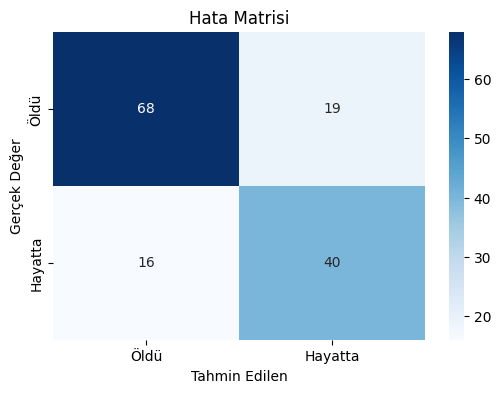

Accuracy    (Doğruluk)          : 0.7552
Precision   (Kesinlik)          : 0.6780
Recall      (Duyarlılık)        : 0.7143
F1-Score    (Harmonik Ortalama) : 0.6957


In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion Matrix'i yazalım.
cm = confusion_matrix(y_test, y_pred)
print("Hata Matrisi:\n", cm)

# Hata Matrisi'ni görselleştirelim.
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Öldü", "Hayatta"], yticklabels=["Öldü", "Hayatta"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Hata Matrisi")
plt.show()

# Metrikleri Hesaplama
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ekrana yazdıralım
print(f"Accuracy    (Doğruluk)          : {acc:.4f}")
print(f"Precision   (Kesinlik)          : {prec:.4f}")
print(f"Recall      (Duyarlılık)        : {rec:.4f}")
print(f"F1-Score    (Harmonik Ortalama) : {f1:.4f}")

|               | **Tahmin: 0** | **Tahmin: 1** |
| ------------- | ------------- | ------------- |
| **Gerçek: 0** | TN = 80       | FP = 7       |
| **Gerçek: 1** | FN = 50       | TP = 6       |


## Diğer Önemli Metrikler

### 1. Özgüllük (Specificity)

* Gerçek negatiflerin ne kadarı doğru tahmin edili?

Denklem:
$$
Specificity = \frac {TN} {FP+TN}
$$

### 2. False Positive Rate (FPR)

* ROC Eğrisi çizilirken kullanılır.
* Hasta olmayan kişiye hasta dedi --> FP
* False Positive Rate, negatif sınıfta olan örneklerden kaç tanesini yanlışlıkla pozitif tahmin edildiğini gösterir.
* Yani, gerçekte negatif olanların kaçı yanlışlıkla pozitif tahmin edildi.

$$
FPR = \frac {FP} {FP+TN}
$$

* FPR çok yüksekse: Çok fazla yanlış alarm veriyor demektir.
* FPR çok düşükse: Gerçek negatifleri genellikle doğru tahmin ediyor.

**Ne zaman önemlidir?**
* Yanlış pozitiflerin ciddi sonuçlar doğurduğu durumlarda,
  * Masum birini suçlu göstermek
  * Normal kredi başvurusunu reddetmek
  * Sağlıklı birine kanser teşhisi koymak

## Algoritma Seçimi İçin Önemli Faktörler

1. Veri Boyutu ve Yapısı: Küçük veri (Naive Bayes, SVM), Büyük Veri (Random Forest, GBM).
2. Özellik Türleri: Kategorik özellikler (Karar Ağaçları, GBM - özellikle CatBoost), Metin verisi (Naive Bayes, SVM).
3. Doğrusallık: Doğrusal ilişki (Lojistik Regresyon), Doğrusal olmayan ilişki (SVM, Karar Ağaçları, GBM, K-NN).
4. Yorumlanabilirlik İhtiyacı: Kritik ise (Lojistik Regresyon, Karar Ağaçları), Önemsiz ise (GBM, SVM).
5. Eğitim/Tahmin Hızı: Hızlı eğitim (Naive Bayes, Lojistik Regresyon), Hızlı tahmin (lojistik Regresyon, SVM, RF/GNM - eğitildikten sonra), Yavaş eğitim (SVM - büyük veride, GBM), Yavaş tahmin (K-NN)
6. Aşırı Öğrenme Riski: Yüksek risk (Karar Ağaçları, K-NN), Düşük risk (RF, GBM - uygun ayarlanırsa, SVM).
7. Doğruluk: En yüksek doğruluk genellikle (dikkatlice ayarlanmış) GBM (XGBoost, LightGBM, CatBoost) veya RF ile elde edilir.

|  **Senaryo**                                 |  **Önemli Metrik(ler)** |  **Açıklama**                                                                  |
| ---------------------------------------------- | ------------------------ | -------------------------------------------------------------------------------- |
| ✅ **Dengeli veri seti**                        | `Accuracy`               | Sınıflar dengeliyse genel doğruluk anlamlıdır.                                   |
| ⚠️ **Yanlış pozitifler maliyetli** (ör. spam)  | `Precision`              | Pozitif dediğimiz örneklerin gerçekten doğru olmasına odaklanır.                 |
| ❗ **Yanlış negatifler maliyetli** (ör. kanser) | `Recall`                 | Gerçek pozitifleri kaçırmamak ön plandadır.                                      |
| ⚖️ **Dengesiz veri seti**                      | `F1-Score`, `ROC-AUC`    | Hem Precision hem Recall denge ister; ROC-AUC model genel ayrım gücünü gösterir. |
